In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import urllib.request

url = 'http://ergast.com/downloads/f1db_csv.zip'
filehandle, _ = urllib.request.urlretrieve(url)
zf = zipfile.ZipFile(filehandle, 'r')

results_df = pd.read_csv(zf.open('results.csv'))
drivers_df = pd.read_csv(zf.open('drivers.csv'))
lap_times_df = pd.read_csv(zf.open('lap_times.csv'))
races_df = pd.read_csv(zf.open('races.csv'))
constructors_df = pd.read_csv(zf.open('constructors.csv'))

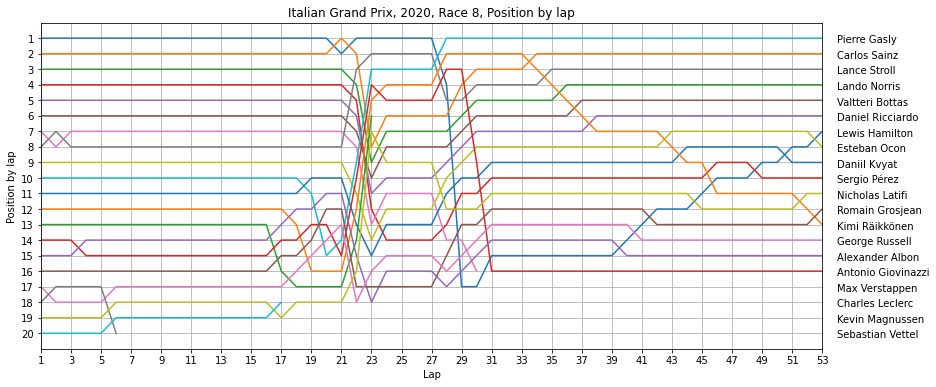

In [2]:
raceId = lap_times_df["raceId"].drop_duplicates().iloc[-1]
race_df = lap_times_df[lap_times_df["raceId"] == raceId]
plt.figure(figsize=(14, 6))    

for driverId in race_df["driverId"].drop_duplicates():
    plt.plot(race_df[race_df["driverId"] == driverId]["lap"],
             race_df[race_df["driverId"] == driverId]["position"])
    y_pos = results_df[(results_df["raceId"] == raceId) & (results_df["driverId"] == driverId)]["positionOrder"] + 0.3
    driver_info = drivers_df[drivers_df["driverId"] == driverId]
    driver_name = driver_info["forename"] + ' ' + driver_info["surname"]
    plt.text(race_df["lap"].values.max() + 1, y_pos, driver_name.iloc[0])

race_name = races_df[races_df["raceId"] == raceId]["name"].iloc[0]
race_year = races_df[races_df["raceId"] == raceId]["year"].iloc[0]
race_round = races_df[races_df["raceId"] == raceId]["round"].iloc[0]

plt.xticks(np.arange(race_df["lap"].values.min(), race_df["lap"].values.max() + 1, 2.0))
plt.yticks(np.arange(1, len(race_df["driverId"].drop_duplicates()) + 1))
plt.xlim(race_df["lap"].values.min(), race_df["lap"].values.max())
plt.ylim(0, len(race_df["driverId"].drop_duplicates()) + 1)
plt.title(str(race_name) + ', ' + str(race_year) + ', Race ' + str(race_round) + ', Position by lap')
plt.xlabel('Lap')
plt.ylabel('Position by lap')
plt.gca().invert_yaxis()
plt.grid()
plt.show()

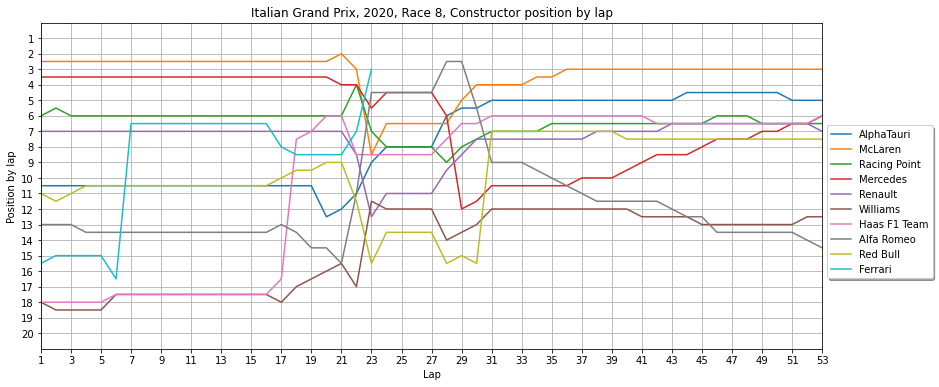

In [3]:
result_df = results_df[results_df.raceId == raceId]
plt.figure(figsize=(14, 6))    

for constId in result_df.constructorId.drop_duplicates():
    const_driverId = [driverId for driverId in result_df[result_df.constructorId == constId].driverId]
    race_df_const = race_df[race_df.driverId.isin(const_driverId)]
    plt.plot([lap for lap in race_df_const.lap.drop_duplicates()],
             [race_df_const[race_df_const.lap == lap].position.sum() / 2 for lap in race_df_const.lap.drop_duplicates()],
             label=constructors_df[constructors_df.constructorId == constId]["name"].iloc[0])

plt.xticks(np.arange(race_df["lap"].values.min(), race_df["lap"].values.max() + 1, 2.0))
plt.yticks(np.arange(1, len(race_df["driverId"].drop_duplicates()) + 1))
plt.xlim(race_df["lap"].values.min(), race_df["lap"].values.max())
plt.ylim(0, len(race_df["driverId"].drop_duplicates()) + 1)
plt.title(str(race_name) + ', ' + str(race_year) + ', Race ' + str(race_round) + ', Constructor position by lap')
plt.xlabel('Lap')
plt.ylabel('Position by lap')
plt.gca().invert_yaxis()
plt.legend(fancybox=True, shadow=True, bbox_to_anchor=(1, 0.7))
plt.grid()
plt.show()